# HW1: Practice with Python, hard-margin SVM, and linear regression

## Sean Wells smwells3

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
- Make a 30x2 numpy array X from the mpg (miles per gallon) and wt (weight in 1000s of pounds) columns. Make an array y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

In [2]:
df = pd.read_csv("mtcars30.csv")

In [3]:
X = np.array([[df.mpg, df.wt]])
X = X.reshape(X.shape[1:]).transpose()
y = np.array(df["am"])

In [4]:
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [5]:
print(f'clf.coef_ = [{clf.coef_[0][0]:.3} {clf.coef_[0][1]:.3}]')
print(f'clf.intercept_ = {clf.intercept_[0]:.3}')

clf.coef_ = [-0.309 -8.24]
clf.intercept_ = 32.0


In [6]:
print(f"clf.score = {clf.score(X,y)}. This model has perfect training accuracy.")

clf.score = 1.0. This model has perfect training accuracy.


In [7]:
predX = np.array([[20,4]])
clf.predict(predX)

array([0])

The model predicts that a car weighing 4000 lbs that gets 20 miles per gallon would have automatic transmission.

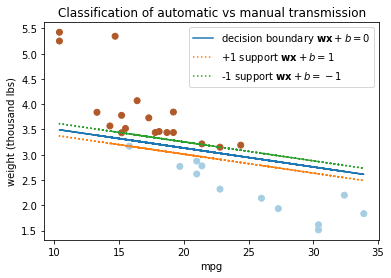

In [8]:
plt.scatter(x=X[:,0], y=X[:,1], c=-y, cmap=plt.cm.Paired)
x1 = X[:, 0]
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]
plt.plot(x1, x2, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.plot(x1, x2 + 1 / clf.coef_[0][1], ':', label=r'+1 support $\mathbf{wx} + b =  1$')
plt.plot(x1, x2 - 1 / clf.coef_[0][1], ':', label=r'-1 support $\mathbf{wx} + b = -1$')
plt.legend()
plt.title('Classification of automatic vs manual transmission')
plt.xlabel('mpg')
plt.ylabel('weight (thousand lbs)')
plt.show(block=False)

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

y = -1/2x + 4

## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

In [9]:
df = pd.read_csv("DJIA.csv")
X = np.array(df["MarketCap"]).reshape(-1,1)
y = np.array(df["AvgVol"])

In [10]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

print(f"(average volume) = {lm.coef_[0]:.3} * (market capitalization) + {lm.intercept_:.3}")

(average volume) = 2.68e-05 * (market capitalization) + 3.41e+06


In [11]:
print(f"lm.score = {lm.score(X,y):.3}")

lm.score = 0.705


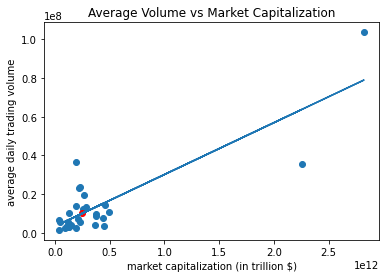

In [12]:
pred = lm.predict([[250000000000]])
plt.scatter(x=X, y=y)
x2 = lm.coef_ * X + lm.intercept_
plt.plot(X,x2)
plt.scatter(250000000000,pred,color="red")
plt.title('Average Volume vs Market Capitalization')
plt.xlabel('market capitalization (in trillion $)')
plt.ylabel('average daily trading volume')
plt.show(block=False)

Our model predicts that Average Volume increases by 2.68e^-05 for every trillion dollar increase in market cap.

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases. (Use a Markdown cell.)

In [13]:
X = df[["MarketCap", "Price"]]
y = df["AvgVol"]
mult = linear_model.LinearRegression()
mult.fit(X,y)
print(f"(average volume) = {mult.coef_[0]:.3} * (market cap.) + {mult.coef_[1]:.3} * (price) + {mult.intercept_:.3}")

(average volume) = 2.89e-05 * (market cap.) + -6.69e+04 * (price) + 1.44e+07


In [14]:
print(f"mult.score = {mult.score(X,y):.3}")

mult.score = 0.823


This model tells us that average daily trading volume increases by roughly 2.89e-05 for each trillion dollar increase in market capitalization and that price has a negative effect of 6.69e+04 per unit increase in price. 